<a href="https://colab.research.google.com/github/mostafa-ja/NLP/blob/main/locality_sensitive_hashing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
import numpy as np
import matplotlib.pyplot as plt


In [190]:
def cosine_similarity(A, b):
    '''
    Input:
        A: a numpy array which corresponds to a word vector
        B: A numpy array which corresponds to a word vector
    Output:
        cos: numerical number representing the cosine similarity between A and B.
    '''
    # you have to set this variable to the true label.
    dot = np.dot(A, b)
    norma = np.linalg.norm(A,axis=1)
    normb = np.linalg.norm(b)
    cos = dot / (norma * normb)

    return cos

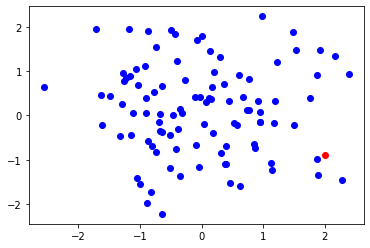

In [191]:
np.random.seed(0)
A = np.random.randn(100,2)
b=np.array([2,-0.9])
plt.scatter(A[:,0],A[:,1],c='b')
plt.scatter(b[0],b[1],c='r')


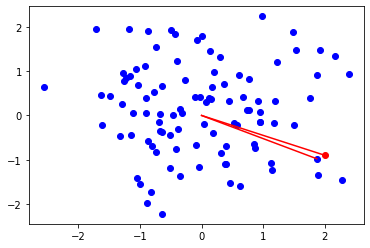

In [192]:
c = A[np.argmax(cosine_similarity(A,b))]
plt.scatter(A[:,0],A[:,1],c='b')
plt.scatter(b[0],b[1],c='r')

plt.plot([0,b[0]],[0,b[1]],c='r')
plt.plot([0,c[0]],[0,c[1]],c='r')

In [193]:
np.random.seed(1)
plane = np.random.normal(size=(2))

h = np.sign(np.dot(A,plane))
clas = (h>=0)
clas

array([ True,  True,  True,  True, False, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
        True,  True, False, False, False,  True,  True,  True, False,
       False, False,  True, False, False,  True, False, False, False,
        True,  True, False, False,  True,  True,  True, False, False,
       False,  True, False, False, False,  True,  True, False, False,
        True, False, False, False, False,  True,  True, False, False,
        True, False, False,  True,  True,  True, False, False, False,
        True,  True,  True, False, False, False,  True,  True,  True,
        True])

In [194]:
plane

array([ 1.62434536, -0.61175641])

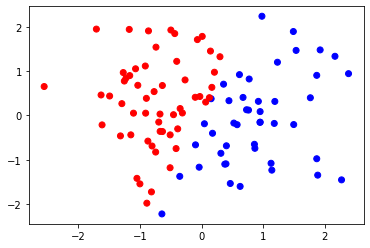

In [195]:
color = ['red','blue']
plt.scatter(A[:,0],A[:,1],c=[color[int(k)] for k in clas ])

In [196]:
np.random.seed(0)

N_DIMS = 2
N_PLANES = 3
N_UNIVERSES = 4

planes = [np.random.normal(size=(N_DIMS, N_PLANES))
            for _ in range(N_UNIVERSES)]


In [197]:
def hash_value_of_vector(v, planes):
  h = np.sign(np.dot(v,planes))
  h = (h>=0)
  h = np.squeeze(h)

  hash_value = 0
  for i in range(planes.shape[1]):
    hash_value += np.power(2,i) * h[i]
  
  return int(hash_value)


In [198]:
def make_hash_table(vecs, planes):
  num_planes = planes.shape[1]
  print(num_planes)
  num_buckets = 2 ** num_planes 
  hash_table = {i:[] for i in range(num_buckets)}

  for v in vecs:
    hash_value = hash_value_of_vector(v, planes)
    hash_table[hash_value].append(v)
  
  return hash_table


In [199]:
hash_table = make_hash_table(A, planes[0])
hash_table

3


{0: [array([-0.38732682, -0.30230275]),
  array([-0.50965218, -0.4380743 ]),
  array([-1.61389785, -0.21274028]),
  array([-0.63432209, -0.36274117]),
  array([-0.67246045, -0.35955316]),
  array([-0.90729836,  0.0519454 ]),
  array([-0.87079715, -0.57884966]),
  array([-0.31155253,  0.05616534]),
  array([-0.69456786, -0.14963454]),
  array([-0.67433266,  0.03183056]),
  array([-1.31590741, -0.4615846 ]),
  array([-1.14746865, -0.43782004]),
  array([-0.80340966, -0.68954978]),
  array([-0.4555325 ,  0.01747916]),
  array([-1.10438334,  0.05216508]),
  array([-1.29285691,  0.26705087])],
 1: [],
 2: [array([-2.55298982,  0.6536186 ]),
  array([-0.34791215,  0.15634897]),
  array([-1.25279536,  0.77749036]),
  array([-0.89546656,  0.3869025 ]),
  array([-1.63019835,  0.46278226]),
  array([-1.16514984,  0.90082649]),
  array([-1.270485  ,  0.96939671]),
  array([-0.76991607,  0.53924919]),
  array([-1.49125759,  0.4393917 ]),
  array([-1.22543552,  0.84436298]),
  array([-1.03424284,  

In [200]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(hash_table)))
colors.shape

(8, 4)

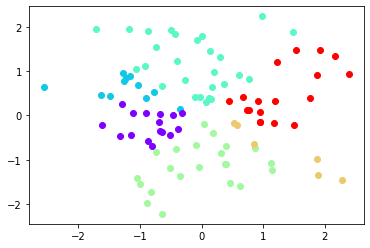

In [201]:
for v in A:
  plt.scatter(v[0],v[1], color=colors[hash_value_of_vector(v, planes[0])])

In [202]:
# a new vector
vector = b
hash_v = hash_value_of_vector(b, planes[0])
print(b,hash_v)

[ 2.  -0.9] 5


In [203]:
sub_A = hash_table[hash_v]
similar_vec = sub_A[np.argmax(cosine_similarity(sub_A,vector))]
similar_vec

array([ 1.86755799, -0.97727788])

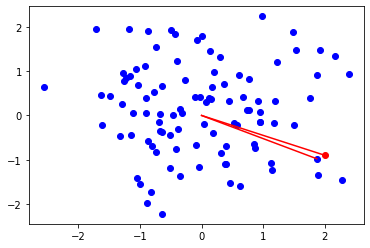

In [204]:
plt.scatter(A[:,0],A[:,1],c='b')
plt.scatter(vector[0],vector[1],c='r')

plt.plot([0,vector[0]],[0,vector[1]],c='r')
plt.plot([0,similar_vec[0]],[0,similar_vec[1]],c='r')